In [1]:
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-07-05 15:28:02.748205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Set the path to the FireNet dataset
firenet_path = 'FIRE-DATASET'

# Set the input size for the images
input_size = (224, 224)

# Define the data generators for the training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    firenet_path,
    target_size=input_size,
    batch_size=32,
    class_mode='categorical',
    subset='training')
val_generator = train_datagen.flow_from_directory(
    firenet_path,
    target_size=input_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [18]:
# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_size[0], input_size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
25/25 [==============================] - 78s 3s/step - loss: 0.4052 - accuracy: 0.8250 - val_loss: 0.5484 - val_accuracy: 0.8543
Epoch 2/10
25/25 [==============================] - 68s 3s/step - loss: 0.3193 - accuracy: 0.8850 - val_loss: 0.2643 - val_accuracy: 0.9095
Epoch 3/10
25/25 [==============================] - 68s 3s/step - loss: 0.1382 - accuracy: 0.9513 - val_loss: 0.1678 - val_accuracy: 0.9497
Epoch 4/10
25/25 [==============================] - 68s 3s/step - loss: 0.0953 - accuracy: 0.9588 - val_loss: 0.1490 - val_accuracy: 0.9347
Epoch 5/10
25/25 [==============================] - 68s 3s/step - loss: 0.0841 - accuracy: 0.9750 - val_loss: 0.1809 - val_accuracy: 0.9196
Epoch 6/10
25/25 [==============================] - 70s 3s/step - loss: 0.0697 - accuracy: 0.9725 - val_loss: 0.1682 - val_accuracy: 0.9246
Epoch 7/10
25/25 [==============================] - 69s 3s/step - loss: 0.0554 - accuracy: 0.9775 - val_loss: 0.1321 - val_accuracy: 0.9598
Epoch 8/10
25/25 [==

In [20]:
# evaluate the model
score = model.evaluate(val_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# we save the model
model.save('model.h5')

Test loss: 0.4436153173446655
Test accuracy: 0.9346733689308167


In [21]:
import numpy as np
from PIL import Image

In [22]:
# load the trained model
model = keras.models.load_model("model.h5")

In [74]:
image = Image.open("testImages/forest.jpeg")
original_image = image  # save the original image to display it later
# lreprocess the user's image
image = image.resize((224, 224))
image_array = np.array(image) / 255.0  # normalization
image_array = np.expand_dims(image_array, axis=0) 

In [75]:
# make a prediction
prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)
print(predicted_class)

1/1 [==============================] - 0s 52ms/step
1


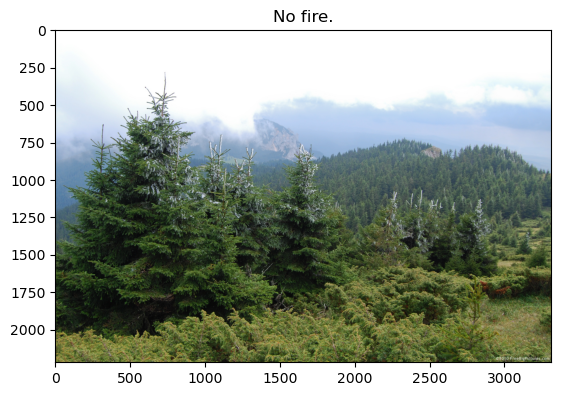

In [76]:
# display the prediction
class_names = ["Fire !", "No fire."]
from matplotlib import pyplot as plt
plt.title(class_names[predicted_class])
plt.imshow(original_image)